In [1]:
import torch as tr
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
class Net(nn.Module):

  def __init__(self,n_hidden,indim=2,outdim=1):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(indim,n_hidden)  
    self.fc2 = nn.Linear(n_hidden,n_hidden)
    self.fc3 = nn.Linear(n_hidden,outdim)

  def forward(self, x):
    h1 = self.fc1(x).relu()
    h2 = self.fc2(h1).relu()
    y_hat = self.fc3(h2)
    return y_hat
  


Net(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


In [3]:
X_xor = tr.Tensor([[0,0],[1,1],[0,1],[1,0]])
y_xor = tr.Tensor([[1],[1],[0],[0]])

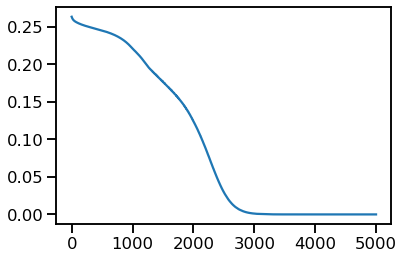

In [14]:
net = Net(3)

loss_op = nn.MSELoss()
optim_op = tr.optim.SGD(net.parameters(), lr=0.01)

L = []
neps=5000
for ep in range(neps):
  optim_op.zero_grad()
  yh = net(X_xor)
  loss_ep = loss_op(yh,y_xor)
  loss_ep.backward()
  optim_op.step()
  L.append(loss_ep.detach().numpy())
plt.plot(L)